## Observations and Insights 

In [1]:
%matplotlib inline

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_study_df = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")

# Display the data table for preview
mouse_study_df.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumour Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
micenum= mouse_study_df["Mouse ID"].nunique()
micenum


249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
#dupemice = mouse_study_df.loc[mouse_study_df.duplicated(subset=["Mouse ID", "Timepoint"]),"Mouse ID"].unique()
dupemice_df = mouse_study_df.loc[mouse_study_df.duplicated(subset=["Mouse ID", "Timepoint"])]

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
dupemice_df



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumour Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = mouse_study_df[mouse_study_df["Mouse ID"].isin(dupemice_df)==False]
clean_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumour Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
micenum= clean_df["Mouse ID"].nunique()
micenum


249

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumour volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumour volume.
drug_regimen_mean = clean_df.groupby("Drug Regimen")["Tumour Volume (mm3)"].mean()
drug_regimen_median = clean_df.groupby("Drug Regimen")["Tumour Volume (mm3)"].median()
drug_regimen_var = clean_df.groupby("Drug Regimen")["Tumour Volume (mm3)"].var()
drug_regimen_std = clean_df.groupby("Drug Regimen")["Tumour Volume (mm3)"].std()
drug_regimen_sem = clean_df.groupby("Drug Regimen")["Tumour Volume (mm3)"].sem()
 # Assemble the resulting series into a single summary dataframe.
drug_regimen_summary_df = pd.DataFrame({"Mean": drug_regimen_mean, "Mediam": drug_regimen_median, "Variance": drug_regimen_var, "Standard Deviation": drug_regimen_std, "SEM": drug_regimen_sem})
drug_regimen_summary_df.head(10)


,Mean,Mediam,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumour volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
summary_df = clean_df.groupby("Drug Regimen").agg({"Tumour Volume (mm3)": ["mean", "median", "var", "std", "sem"]})
summary_df.head(15)


Tumour Volume (mm3)                                          
                            mean     median        var       std       sem
Drug Regimen                                                              
Capomulin              40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin               52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol              52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril               55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol               54.331565  52.509285  66.173479  8.134708  0.596466
Placebo                54.033581  52.288934  61.168083  7.821003  0.581331
Propriva               52.322552  50.854632  42.351070  6.507770  0.512884
Ramicane               40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn               54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol              53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

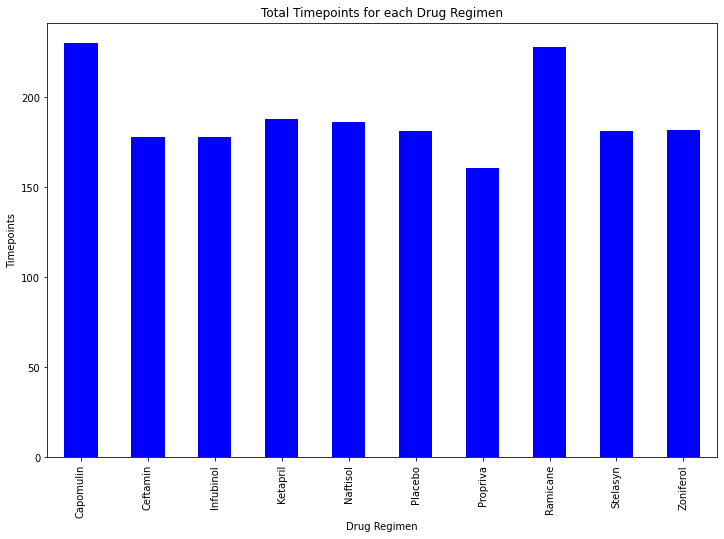

<Figure size 432x288 with 0 Axes>

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
#Timepoints count for each drug regimen
figureA = clean_df.groupby(["Drug Regimen"])["Timepoint"].count()
#bar plot
figureA.plot(kind="bar", figsize=(12,8), color="b", align="center",title="Total Timepoints for each Drug Regimen")

plt.xlabel("Drug Regimen")
plt.ylabel("Timepoints")

plt.show()
plt.tight_layout()


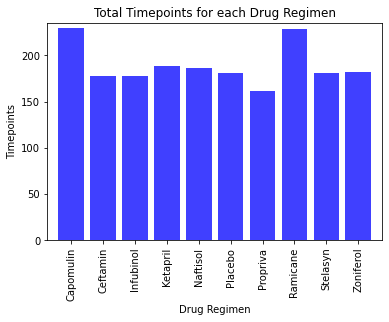

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
drug_regimen = figureA

x_axis = np.arange(0, len(drug_regimen))
tick_lebels = [value for value in drug_regimen.index]

y_axis = drug_regimen

plt.title("Total Timepoints for each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Timepoints")

plt.xlim(-0.75, len(drug_regimen)-.25)
plt.ylim(0, max(y_axis) + 5)

plt.bar(x_axis, y_axis, facecolor="blue", alpha=0.75, align="center")
plt.xticks(x_axis, tick_lebels, rotation="vertical")
plt.rcParams['figure.figsize'] = [10, 12]
plt.show()


In [11]:
#Prepare data for pie chart
sex_count = clean_df["Sex"].value_counts()
sex_type= pd.DataFrame(sex_count)
sex_type.index

Index(['Male', 'Female'], dtype='object')

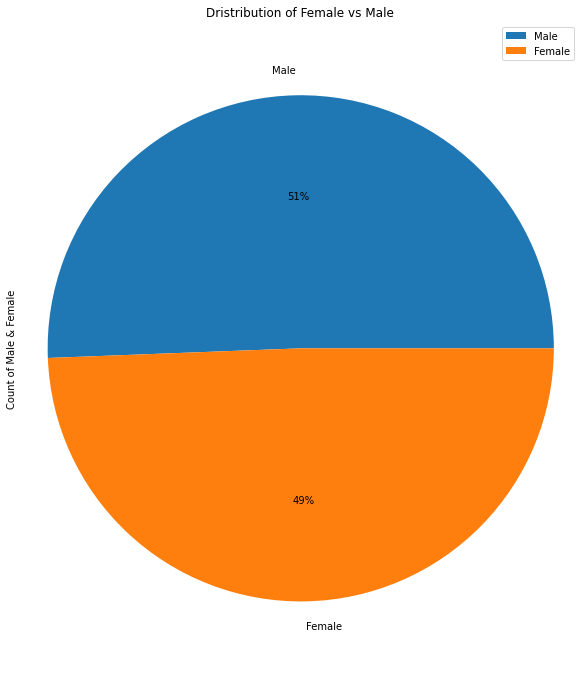

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

figureB = sex_type.plot(kind="pie", y='Sex', title=("Dristribution of Female vs Male"), autopct='%1.0f%%')
figureB.set_ylabel("Count of Male & Female")

plt.axis("equal")
plt.show()


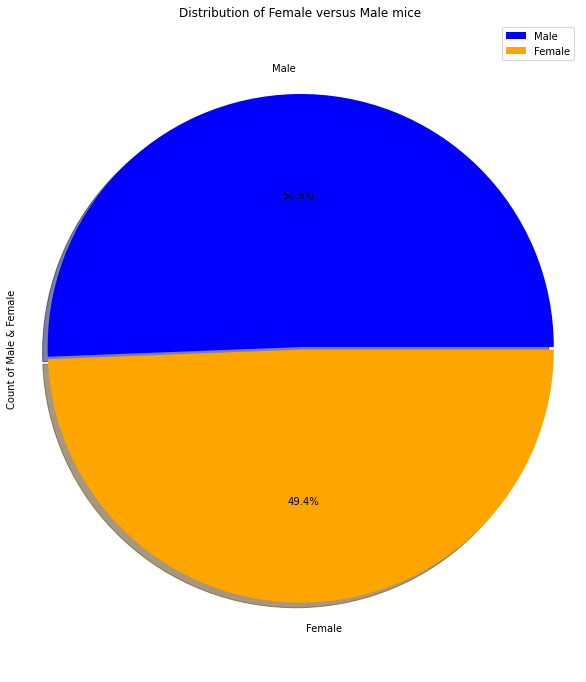

In [21]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
pies = sex_count.index
pie_votes = sex_count
colours = ["blue","orange",]
explode = (0.01,0)

plt.pie(pie_votes, explode=explode, labels=pies, colors=colours, autopct="%1.1f%%", shadow=True, startangle=0)
# Create axes which are equal so we have a perfect circle
plt.axis("equal")
plt.title("Distribution of Female versus Male mice")
plt.ylabel("Count of Male & Female")
plt.legend(["Male", "Female"], loc ="upper right")
plt.show()



## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

Capomulin_df = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin",:]
Ramicane_df = clean_df.loc[clean_df["Drug Regimen"] == "Ramicane", :]
Infubinol_df = clean_df.loc[clean_df["Drug Regimen"] == "Infubinol", :]
Ceftamin_df = clean_df.loc[clean_df["Drug Regimen"] == "Ceftamin", :]

# Start by getting the last (greatest) timepoint for each mouse
def max_timepoint(df):
    input_treat_last = df.groupby('Mouse ID')['Timepoint'].max()
    input_treat_df = pd.DataFrame(input_treat_last)
    input_treat_merge = pd.merge(input_treat_df, clean_df, on=["Mouse ID","Timepoint"],how="left")
    #input_treat_merge = input_treat_df.merge(clean_df, on=["Mouse ID","Timepoint"],how="left")
    return input_treat_merge

# Merge this group df with the original dataframe to get the tumour volume at the last timepoint
Capomulin_merge = max_timepoint(Capomulin_df)
Ramicane_merge = max_timepoint(Ramicane_df)
Infubinol_merge = max_timepoint(Infubinol_df)
Ceftamin_merge = max_timepoint(Ceftamin_df)
Capomulin_merge.head()


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumour Volume (mm3),Metastatic Sites
0,b128,45,Capomulin,Female,9,22,38.982878,2
1,b742,45,Capomulin,Male,7,21,38.939633,0
2,f966,20,Capomulin,Male,16,17,30.485985,0
3,g288,45,Capomulin,Male,3,19,37.074024,1
4,g316,45,Capomulin,Female,22,22,40.159220,2


In [15]:
# Put treatments into a list for for loop (and later for plot labels)

# Create empty list to fill with tumour vol data (for plotting)

Capomulin_tumors = Capomulin_merge["Tumour Volume (mm3)"]
Ramicane_tumors = Ramicane_merge["Tumour Volume (mm3)"]
Infubinol_tumors = Infubinol_merge["Tumour Volume (mm3)"]
Ceftamin_tumors = Ceftamin_merge["Tumour Volume (mm3)"]


# Define a function to Calculate the IQR and 
# quantitatively determine if there are any potential outliers. 
def quartiles(df):
    quartiles = df["Tumour Volume (mm3)"].quantile([0.25,0.5,0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    print(f"The lower quartile of tumour volume is: {lowerq}")
    print(f"The upper quartile of tumour volume is: {upperq}")
    print(f"The interquartile range of tumour volume is: {iqr}")
    print(f"The the median of tumour volume is: {quartiles[0.5]} ")
    # Determine outliers using upper and lower bounds
    outliers = df.loc[(df["Tumour Volume (mm3)"] < lower_bound) | (df["Tumour Volume (mm3)"] > upper_bound)]
    if len(outliers) > 0:
        print("Potential outlier is: "+ outliers["Mouse ID"])
    print("--------------------------------------------------")
    return

quartiles(Capomulin_merge)
quartiles(Ramicane_merge)
quartiles(Infubinol_merge)
quartiles(Ceftamin_merge)   

The lower quartile of tumour volume is: 32.37735684
The upper quartile of tumour volume is: 40.1592203
The interquartile range of tumour volume is: 7.781863460000004
The the median of tumour volume is: 38.1251644 
--------------------------------------------------
The lower quartile of tumour volume is: 31.56046955
The upper quartile of tumour volume is: 40.65900627
The interquartile range of tumour volume is: 9.098536719999998
The the median of tumour volume is: 36.56165229 
--------------------------------------------------
The lower quartile of tumour volume is: 54.04860769
The upper quartile of tumour volume is: 65.52574285
The interquartile range of tumour volume is: 11.477135160000003
The the median of tumour volume is: 60.16518046 
5    Potential outlier is: c326
Name: Mouse ID, dtype: object
--------------------------------------------------
The lower quartile of tumour volume is: 48.72207785
The upper quartile of tumour volume is: 64.29983003
The interquartile range of tumour 

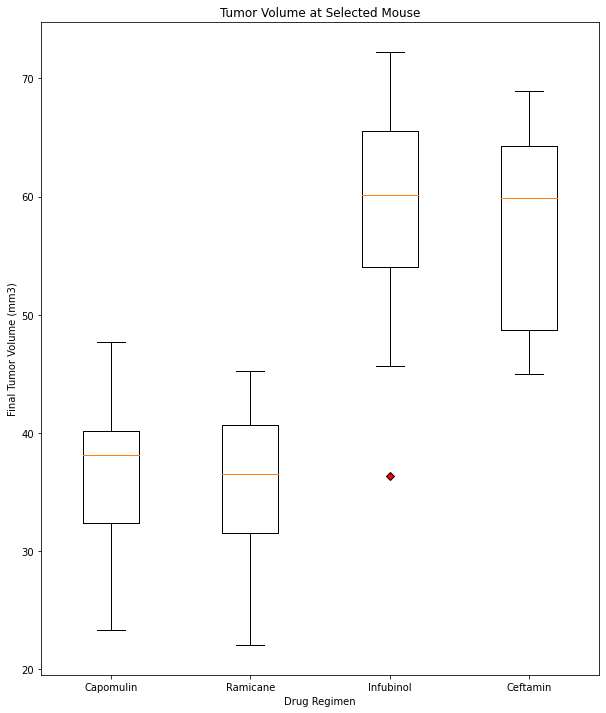

In [16]:
# Generate a box plot of the final tumour volume of each mouse across four regimens of interest
data_to_plot = [Capomulin_tumors, Ramicane_tumors, Infubinol_tumors, Ceftamin_tumors]
Regimen = ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']
#Variable to change the colour of the potential outlier in boxplot
red_diamond = dict(markerfacecolor='r', marker='D')

fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Volume at Selected Mouse')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.set_xlabel('Drug Regimen')
ax1.boxplot(data_to_plot, flierprops=red_diamond, labels=Regimen, widths = 0.4, vert=True)
plt.show()

## Line and Scatter Plots

Text(0, 0.5, 'Tumour Volume (mm3)')

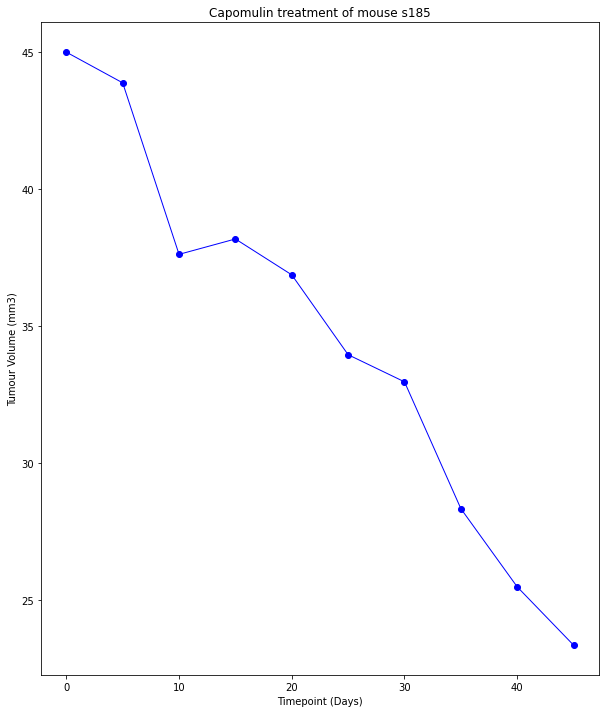

In [17]:
# Generate a line plot of tumour volume vs. time point for a mouse treated with Capomulin
Capomulin_plot = Capomulin_df[["Mouse ID", "Tumour Volume (mm3)", "Timepoint"]]
Capomulin_plot = Capomulin_plot.loc[Capomulin_plot["Mouse ID"] == "s185",:]
Capomulin_plot = Capomulin_plot.set_index("Mouse ID")

plt.plot(Capomulin_plot["Timepoint"],Capomulin_plot["Tumour Volume (mm3)"], marker="o", color="blue", linewidth=1)
plt.title("Capomulin treatment of mouse s185")
plt.xlabel("Timepoint (Days)")
plt.ylabel("Tumour Volume (mm3)")

Text(0, 0.5, 'Average Tumor Volume (mm3)')

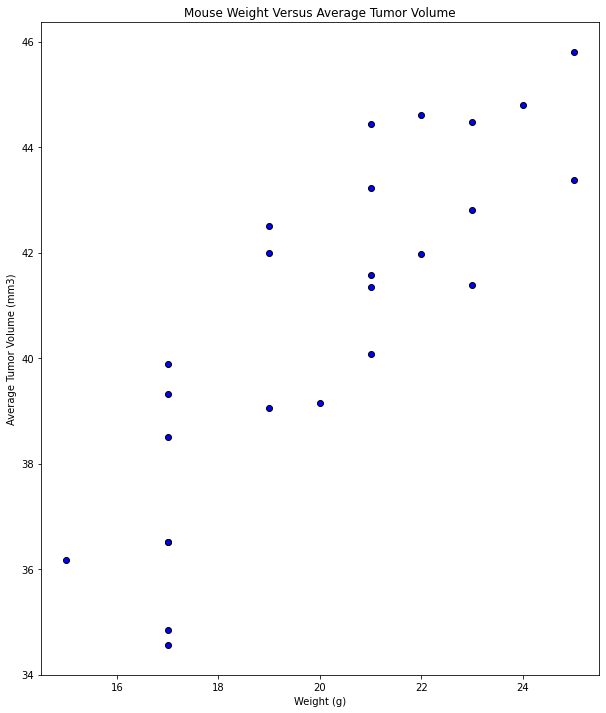

In [18]:
# Generate a scatter plot of average tumour volume vs. mouse weight for the Capomulin regimen
Capomulin_scatter = Capomulin_df[["Mouse ID", "Tumour Volume (mm3)", "Weight (g)"]]
Capomulin_scatter = Capomulin_scatter.groupby("Mouse ID").mean()
#Capomulin_scatter
plt.scatter(Capomulin_scatter["Weight (g)"],Capomulin_scatter["Tumour Volume (mm3)"], marker="o", facecolors="blue", edgecolors="black")
plt.title('Mouse Weight Versus Average Tumor Volume')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')


## Correlation and Regression

In [19]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumour volume for the Capomulin regimen
correlation = st.pearsonr(Capomulin_scatter['Weight (g)'],Capomulin_scatter['Tumour Volume (mm3)'])
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")


The correlation between mouse weight and the average tumor volume is 0.84
